Path found: [1, 2, 3, 7, 8, 9]


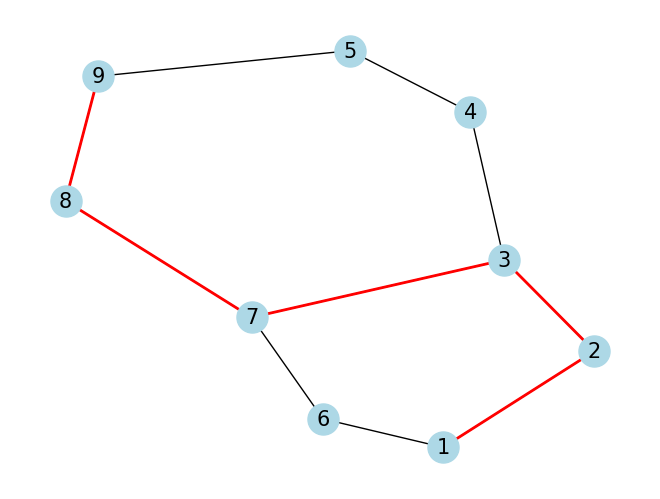

In [3]:
#A* algorithm
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def a_star_search(G, start, goal):
    # Heuristic function for A* search
    def heuristic(node):
        return abs(node-goal)

    # Priority queue for nodes to explore
    frontier = [(0, start)]  # (cost + heuristic, node)
    came_from = {start: None}
    cost_so_far = {start: 0}

    while frontier:
        current_cost, current_node = heapq.heappop(frontier)

        if current_node == goal:
            return reconstruct_path(came_from, start, goal)

        for neighbor in G.neighbors(current_node):
            new_cost = cost_so_far[current_node] + G[current_node][neighbor].get('weight', 1)
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor)
                heapq.heappush(frontier, (priority, neighbor))
                came_from[neighbor] = current_node

    return None

def reconstruct_path(came_from, start, goal):
    path = []
    node = goal
    while node:
        path.append(node)
        node = came_from[node]
    return path[::-1]

def display_graph_and_path(G, path):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=15)
    if path:
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color='r', width=2)
    plt.show()

# Example usage
G = nx.Graph()
G.add_weighted_edges_from([
    (1, 2, 1), (2, 3, 2), (3, 4, 1), (4, 5, 3),
    (1, 6, 5), (6, 7, 2), (7, 8, 1), (8, 9, 1),
    (5, 9, 1), (3, 7, 1)
])

start_node, goal_node = 1, 9
path = a_star_search(G, start_node, goal_node)
print("Path found:", path)
display_graph_and_path(G, path)

In [ ]:
#DFS PATH
def dfs_path(graph, start, goal):
    visited = set()
    stack = [[start]]  # Stack of paths, each path is a list of nodes

    while stack:
        path = stack.pop()  # Pop the last path (LIFO)
        node = path[-1]  # Get the last node in the path

        if node == goal:
            return path

        if node not in visited:
            visited.add(node)
            for neighbour in graph[node]:
                if neighbour not in visited:
                    new_path = list(path)
                    new_path.append(neighbour)
                    stack.append(new_path)

    return None

# Test DFS
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': []
}
print("DFS Path from 5 to 8:", dfs_path(graph, '5', '8'))

DFS Path from 5 to 8: ['5', '7', '8']


In [ ]:
#BFS PATH
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': []
}

def bfs_path(graph, start, goal):
    visited = [start]
    queue = [[start]]

    while queue:
        path = queue.pop(0)
        node = path[-1]

        if node == goal:
            return path

        for neighbour in graph[node]:
            if neighbour not in visited:
                visited.append(neighbour)
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)

    return None

print("Path from 5 to 8:", bfs_path(graph, '5', '8'))

Path from 5 to 8: ['5', '7', '8']


In [ ]:
#Iterative Deepening Search (IDS)
def dfs_limited(graph, node, goal, depth, path, visited):
    if depth < 0:
        return None
    if node == goal:
        return path

    visited.add(node)
    for neighbour in graph[node]:
        if neighbour not in visited:
            result = dfs_limited(graph, neighbour, goal, depth - 1, path + [neighbour], visited.copy())
            if result:
                return result
    return None

def ids_path(graph, start, goal):
    depth = 0
    while True:
        result = dfs_limited(graph, start, goal, depth, [start], set())
        if result:
            return result
        depth += 1
        if depth > len(graph):  # Prevent infinite loops in disconnected graphs
            return None

# Test IDS
print("IDS Path from 5 to 8:", ids_path(graph, '5', '8'))